In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
chopped = pd.read_csv('data/chopped.csv')

In [3]:
chopped.isnull().sum()

season                0
season_episode        0
series_episode        0
episode_name          0
episode_notes       113
air_date              0
judge1                1
judge2                1
judge3                1
appetizer             0
entree                0
dessert               1
contestant1           1
contestant1_info     13
contestant2           0
contestant2_info     14
contestant3           0
contestant3_info     13
contestant4           0
contestant4_info     14
dtype: int64

In [4]:
# Drop irrelevant rows
#chopped = chopped.drop(columns=['season','season_episode','series_episode','air_date','appetizer','entree','dessert','contestant1','contestant2','contestant3','contestant4'])
keep = ['episode_name','episode_notes','judge1','judge2','judge3','contestant1_info','contestant2_info','contestant3_info','contestant4_info']
chopped = chopped[keep]
chopped.head()

,episode_name,episode_notes,judge1,judge2,judge3,contestant1_info,contestant2_info,contestant3_info,contestant4_info
0,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,Private Chef and Nutrition Coach New York NY,Private Chef and Sous chef Bar Blanc New Yo...,Pastry Chef Olana Restaurant New York NY,Catering Chef Showstoppers Catering at Union...
1,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,Private Caterer and Culinary Instructor West...,Chef de cuisine Liberty National Golf Course...,Executive Chef and Owner Ted and Honey Broo...,Owner and Chef Chef for Hire LLC Newville PA
2,"""Avocado, Tahini, Bran Flakes""",NaN,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,Executive Chef and Co-owner La Palapa New Y...,Chef de cuisine SoHo Grand Hotel New York NY,Private Chef New York NY,Chef tournant L’Atelier de Joël Robuchon Ne...
3,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...",Scott Conant,Amanda Freitag,Geoffrey Zakarian,Executive Chef Ayza Wine Bar New York NY,Chef Registered Dietician and Culinary Consu...,Executive Chef Knickerbocker Bar & Grill Ne...,Chef and Owner Taïm New York NY
4,"""Yucca, Watermelon, Tortillas""",NaN,Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,Personal Chef New York NY,Executive Chef New York NY,Executive Chef / Wine Director Bloomingdale ...,Chef de cuisine Gordon Ramsay at The London ...


In [5]:
for i, col in enumerate(chopped.columns):
    chopped.iloc[:, i] = chopped.iloc[:, i].str.replace('"', '')

In [6]:
# create new column to include all information in one string
chopped['combined'] = chopped[keep].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [7]:
# calculate TFIDFvectorizor scores
# ngram_range=(1,3),
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',min_df=.01,max_df=.8)
tfidf = vectorizer.fit_transform(chopped['combined'])
tfidf

<569x1167 sparse matrix of type '<class 'numpy.float64'>'
	with 27533 stored elements in Compressed Sparse Row format>

In [8]:
vectorizer

TfidfVectorizer(max_df=0.8, min_df=0.01, ngram_range=(1, 3),
                stop_words='english')

In [9]:
# calculate similarity scores between all episodes
cosine_sim = cosine_similarity(tfidf)


In [10]:
# create function to print similar episodes and similarity scores
def get_recs(episode_name):
    enumerated = enumerate(cosine_sim[chopped[chopped['episode_name'] == episode_name].index[0]])
    listed = list(enumerated)
    sorteds = sorted(listed,key = lambda x:x[1], reverse=True)[:10]
    return sorteds

# create function to print names of similar episodes
def get_names(episode_name):
    sorteds = get_recs(episode_name)
    j = 0
    for i in sorteds[1:]:
        episode = chopped.iloc[i[0]].episode_name
        print('Episode ', i[0]+1, ': ', episode)
        j+=1

In [11]:
# test function
episode = "Octopus, Duck, Animal Crackers"
get_recs(episode)

[(0, 1.0),
 (36, 0.5126709799782215),
 (41, 0.44883123887885856),
 (554, 0.4357045335728815),
 (21, 0.41187529198186135),
 (2, 0.39817326433455863),
 (13, 0.37974451426695144),
 (78, 0.3775370795004665),
 (35, 0.3727629212045674),
 (53, 0.3719341217947912)]

In [12]:
# test get_names
get_names(episode)

Episode  37 :  Raw Enthusiasm
Episode  42 :  Jitters & Giant Eggs
Episode  555 :  Lighten Up!
Episode  22 :  Buckwheat Blunders and Twists of Fate
Episode  3 :  Avocado, Tahini, Bran Flakes
Episode  14 :  A Prickly Situation
Episode  79 :  Canned Cheese, Please!
Episode  36 :  In A Pinch
Episode  54 :  Wok This Way


In [13]:
# test get_names
get_names(episode)

Episode  37 :  Raw Enthusiasm
Episode  42 :  Jitters & Giant Eggs
Episode  555 :  Lighten Up!
Episode  22 :  Buckwheat Blunders and Twists of Fate
Episode  3 :  Avocado, Tahini, Bran Flakes
Episode  14 :  A Prickly Situation
Episode  79 :  Canned Cheese, Please!
Episode  36 :  In A Pinch
Episode  54 :  Wok This Way


In [133]:
get_names('It\'s a Sibling Thing')

Episode  498 :  Whiz Kid Cooks
Episode  253 :  Teen Tournament: Part Two
Episode  255 :  Teen Tournament: Part Four
Episode  192 :  Teen Invasion
Episode  254 :  Teen Tournament: Part Three
Episode  306 :  Teen Tournament: Episode Three
Episode  309 :  Teen Tournament: Grand Finale
Episode  307 :  Teen Tournament: Episode Four
Episode  252 :  Teen Tournament: Part One


In [114]:
get_names('Chopped All-Stars: Judges')

Episode  170 :  Chopped All-Stars: Mega Chefs
Episode  120 :  All-Stars: Judge Remix
Episode  289 :  Judges' Face-Off
Episode  172 :  Chopped All-Stars: Celebrities
Episode  297 :  Rock Stars
Episode  169 :  Chopped All-Stars: Food Network vs. Cooking Channel
Episode  117 :  All-Stars: Iron Chefs Do Battle
Episode  229 :  Chopped Tournament of Stars: Sports Stars!
Episode  173 :  Chopped All-Stars: Finale!


# Visualize Episode Clusters

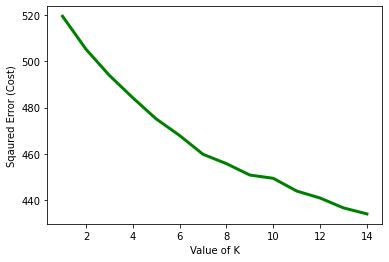

In [117]:
cost =[] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(tfidf)
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 15), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.savefig('')

In [118]:
k = 7

model = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model.fit(tfidf)

KMeans(max_iter=100, n_clusters=7, n_init=1)

In [119]:
chopped['cluster'] = model.labels_

<ipython-input-119-368b8ced64d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chopped['cluster'] = model.labels_


In [122]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" %i)
    for j in order_centroids[i, :10]: # print most relevant terms in cluster
        print(' %s' % terms[j])
    print('---')

Cluster centroids: 

Cluster 0:
 ca
 los angeles
 angeles
 los
 los angeles ca
 angeles ca
 executive
 executive chef
 san
 ca chef
---
Cluster 1:
 charity
 stars
 foundation
 tournament
 stars tournament
 chopped
 round
 000 charity
 choice
 america
---
Cluster 2:
 age
 teen
 ny age
 age 16
 16
 age 17
 nj age
 17
 teen tournament
 age 15
---
Cluster 3:
 ny
 york
 new york
 york ny
 new york ny
 new
 executive
 executive chef
 ny executive
 ny executive chef
---
Cluster 4:
 nan nan
 nan
 nan nan nan
 contestants
 power
 star
 celebrity
 heat
 holiday
 conant
---
Cluster 5:
 episode
 ny episode
 york ny episode
 champions
 tournament
 chopped
 winner
 round
 11
 final
---
Cluster 6:
 owner
 chef owner
 executive
 executive chef
 round
 ny
 episode
 new
 las
 las vegas
---


In [124]:
cluster_descriptions = ['LA','Celebs/Charity','Teens','NY','Celebs/Holiday','Champions','NY/Vegas']

Text(0.5, 1.0, 'All Features - PCA')

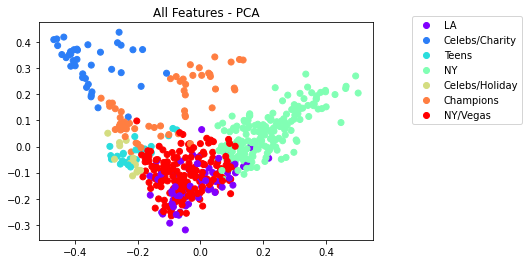

In [125]:
## visualizing cluster

kmean_indices = model.fit_predict(tfidf)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(tfidf.toarray())
centers_reduced = pca.transform(model.cluster_centers_)

scatter = plt.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=chopped['cluster'],
            cmap='rainbow')
labels = np.unique(chopped['cluster'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, cluster_descriptions,bbox_to_anchor=(1.1, 1.05))
plt.title('')
#plt.savefig('All Features - PCA')

In [138]:
chopped.iloc[[170,288,295,12,50,168,265,507,0],[0,1,-1]].sort_values(by=['cluster'])

,episode_name,episode_notes,cluster
170,Chopped All-Stars: Judges,This is part 3 of a 5-part charity tournament....,1
288,Judges' Face-Off,All basket ingredients were leftovers. All con...,1
168,Chopped All-Stars: Food Network vs. Cooking Ch...,This is the second tournament of the season. T...,1
507,It's a Sibling Thing,This was a team cook episode where the duos we...,2
295,Tendon Intentions,The trash fish in round 2 was scut fish (speci...,3
50,Crunch Time,This was the first appearance of Madison Cowan...,3
0,"Octopus, Duck, Animal Crackers",This is the first episode with only three offi...,3
265,Chopped Family Thanksgiving,This was a special Thanksgiving episode where ...,4
12,"Strawberries, Turkey and Gummi Bears",NaN,6


# Web App

In [16]:
import pickle

pickle.dump(chopped.to_dict(), open('episodes.pkl','wb'))

In [15]:
chopped['episode_name'].values

array(['Octopus, Duck, Animal Crackers', 'Tofu, Blueberries, Oysters',
       'Avocado, Tahini, Bran Flakes', 'Banana, Collard Greens, Grits',
       'Yucca, Watermelon, Tortillas',
       'Canned Peaches, Rice Cakes, Beets', 'Quail, Arctic Char, Beer',
       'Coconut, Calamari, Donuts', 'Mac & Cheese, Cola, Bacon',
       'String Cheese, Jicama, Gingersnaps',
       'Jumbo Shrimp, Pepperoncini, Cereal',
       'Chocolate, Mussels and Figs',
       'Strawberries, Turkey and Gummi Bears', 'A Prickly Situation',
       'Salty Veggies & Heated Battles', 'High Hopes',
       'Floundering Around', 'Pride on the Plate',
       'Pretty Please with a Pepper on Top',
       'Pods, Grills and Sticky Fingers', 'A Wish Upon A Starfruit',
       'Buckwheat Blunders and Twists of Fate',
       'Chopped Champions Event, Round One: The Ultimate Face-off',
       'Chopped Champions Event, Round Two: Best of the Best',
       'Chopped Champions Event, Round Three: All-Stars Showdown',
       'Chopped C

In [17]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))